In [3]:
using Random
using Distributions
using FFTW
using LinearAlgebra 
using Arpack 
using Plots
using LaTeXStrings

In [4]:
sigma=0.4; 
theta=0.5;  #the twist
Nreal=1000;  #number of samples 

tk(n,sig,ll,th)=-sign(cos(2.0*pi*n/ll+th/ll))*abs(cos(2.0*pi*n/ll+th/ll))^sig; #k-space Hamiltonian

In [5]:
##### Ln=2;     #number of sample sizes
#W=0.5; 
Nbox=25;   #number of boxes (which should be selected such that L/Nbox must be integer)
q = 0.4;        #exponent in generalized inverse participation ratio 
NW = 20;    # number of disorder strengths
ws=0.05;    # step size of disorder strength
  

Random.seed!(234) #setting the seed 

LL=[100,200,300,400]

Alpha_q = zeros(NW,length(LL));

for l in 1:length(LL)
    
    L=LL[l]; 
    
    lambda = (L/Nbox)/L;   #aspect ratio

    alpha_q = zeros(NW);


    for w in 1:NW

        W=ws*w

#         dis=Normal(0.0, W) 


        Rq=zeros(Nreal);
        Sq=zeros(Nreal);

        for ireal in 1:Nreal 

#             Vx=rand(dis,L);#generating random potential according to normal distribution
            Vx = W.*randn(L) 

            #Vx = zeros(L)

            Hk = zeros(L)   #kinetic part of k-space Hamiltonian

            for l in 1:L
                Hk[l] = tk(l,sigma,L,theta)
            end 

            Hf = ifft(Hk)

            #Hf = ifftshift(Hf)

            H = zeros(Complex{Float64},L,L); 

            for i in 1:L
                for j in 1:L
                    if i==j
                        H[i,j] = Vx[i] - sum(Vx)/L
                    elseif i>j
                        H[i,j] = Hf[i-j+1]
                    else
                        H[i,j] = conj(Hf[j-i+1]) 
                    end
                end
            end 

            en0, evec0=eigs(H,nev=1,which=:SM);

            Nrm = sqrt(sum(abs.(evec0).^2))

            mu=zeros(Nbox);    
            for k in 1:Nbox
                mu[k]=sum(abs.(evec0[((k-1)*div(L,Nbox))+1:k*div(L,Nbox)]).^2)/Nrm;
            end

            #alpha=mu./(log(lambda)); 

            Rq0=sum(mu.^q);
            Sq0=sum((mu.^q).*(log.(mu))); 

            Rq[ireal]=Rq0;
            Sq[ireal]=Sq0;
        end

        alpha_q0=(sum(Sq)/Nreal)/((sum(Rq)/Nreal)*log(lambda)); 

        alpha_q[w]=alpha_q0; 

    end
    
    Alpha_q[:,l] = alpha_q;
    
end

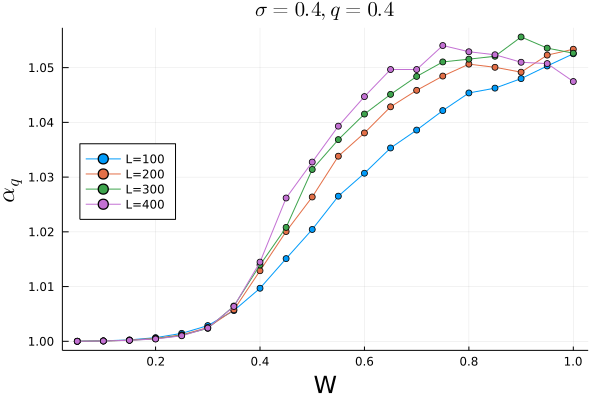

In [6]:
ticks=ws*[1:1:NW;];
#ticks=round.(range(0.01,stop=0.2,length = 20),digits=2)
#plot(ticks,Alpha_q[:,1],label="L=150",xlabel="W",ylabel=L"\textrm{Value~of~}\alpha_q",fmt = :png)
plot(ticks,Alpha_q[:,1],label="L=100",xlabel="W",ylabel=L"\alpha_q",fmt = :png,guidefont=font(16),
    legend=:left,title=L"\sigma=0.4, q=0.4",shape=:circle)
plot!(ticks,Alpha_q[:,2],label="L=200",shape=:circle)
plot!(ticks,Alpha_q[:,3],label="L=300",shape=:circle)
plot!(ticks,Alpha_q[:,4],label="L=400",shape=:circle)

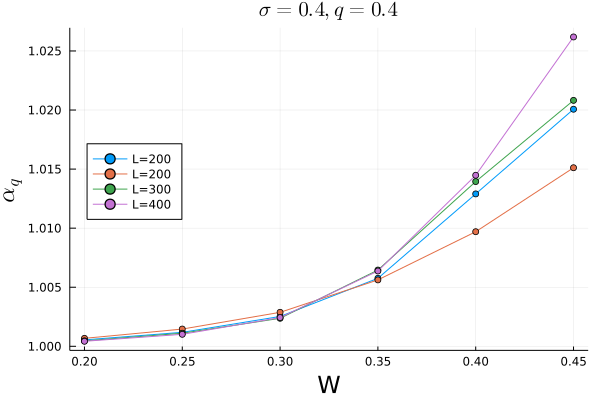

In [7]:
ticks=ws*[4:1:Int(NW/2)-1;];
#ticks=round.(range(0.01,stop=0.2,length = 20),digits=2)
#plot(ticks,Alpha_q[:,1],label="L=150",xlabel="W",ylabel=L"\textrm{Value~of~}\alpha_q",fmt = :png)
plot(ticks,Alpha_q[4:Int(NW/2)-1,2],label="L=200",xlabel="W",ylabel=L"\alpha_q",fmt = :png,guidefont=font(16),
    legend=:left,title=L"\sigma=0.4, q=0.4",shape=:circle)
plot!(ticks,Alpha_q[4:Int(NW/2)-1,1],label="L=200",shape=:circle)
plot!(ticks,Alpha_q[4:Int(NW/2)-1,3],label="L=300",shape=:circle)
plot!(ticks,Alpha_q[4:Int(NW/2)-1,4],label="L=400",shape=:circle)